In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Group D. stroke_data.csv')

In [7]:
df.loc[(df['age'] <= 17) & (df['work_type'] == 'children')];

In [12]:
df = df.dropna()

In [10]:
df1.to_csv("Stroke_data_cleaned.csv")

In [9]:
df1 = df.dropna()
df2 = df1.drop((df1[df1['work_type'] == 'children'].index))
df3 = df2.drop((df2[df2['age'] <= 17].index));

In [413]:
df3.loc[(df3['bmi'] > 45)];

In [414]:
df2.loc[(df2['age'] <= 17) & (df2['ever_married'] == 'Yes')];

In [415]:
df2.loc[(df2['age'] <= 17) & (df2['stroke'] == 1.0)];

In [410]:
x1 = df1.drop((df1[df1['bmi'] > 50].index))
x2 = x1.drop((x1[x1['age'] < 17].index));

In [417]:
df1['bmi'].median();

Text(0.5, 1.0, 'bmi')

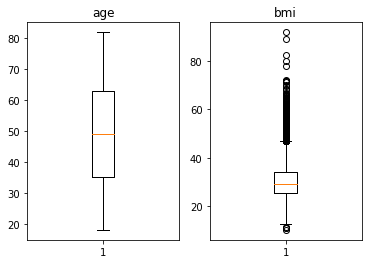

In [346]:
#df1['age'].plot(kind='box')
fig, axs = plt.subplots(1, 2)

# basic plot
axs[0].boxplot(df3['age'])
axs[0].set_title('age')

axs[1].boxplot(df3['bmi'])
axs[1].set_title('bmi')

#axs[1, 0].boxplot(df1['avg_glucose_level'])

#axs[1, 1].boxplot()

Text(0, 0.5, 'bmi')

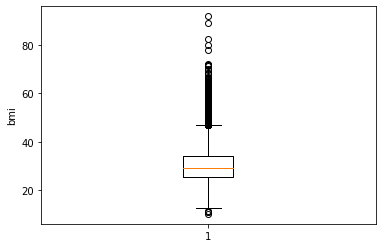

In [420]:
plt.boxplot(df3['bmi'])
plt.ylabel('bmi')

Text(0, 0.5, 'bmi')

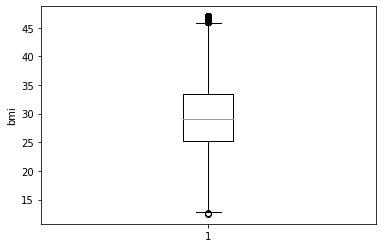

In [421]:
#removing outliers of bmi 
Q1 = df3['bmi'].quantile(0.25)
Q3 = df3['bmi'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df3['bmi'] >= Q1 - 1.5 * IQR) & (df3['bmi'] <= Q3 + 1.5 *IQR)
df4 = df3.loc[filter]
plt.boxplot(df4['bmi'])
plt.ylabel('bmi')

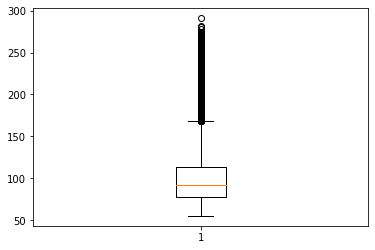

In [372]:
plt.boxplot(df4['avg_glucose_level']);

In [412]:
df4.loc[df4['avg_glucose_level'] > 200];

In [374]:
df4['bmi'].max();

In [375]:
df4['bmi'].min();

In [376]:
df4['avg_glucose_level'].min();

In [377]:
df4['avg_glucose_level'].max();

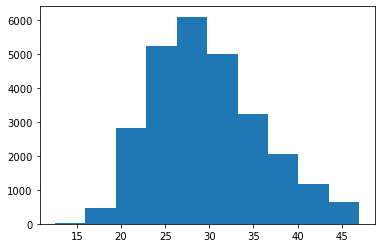

In [378]:
plt.hist(df4['bmi']);

Text(0, 0.5, 'heart disease')

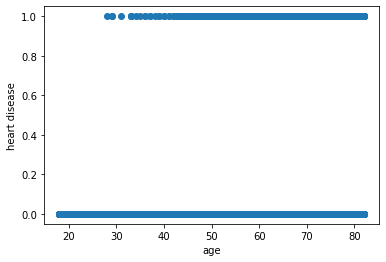

In [367]:
plt.scatter(x = df4['age'], y = df4['heart_disease'])
plt.xlabel('age')
plt.ylabel('heart disease')

Text(0, 0.5, 'hypertension')

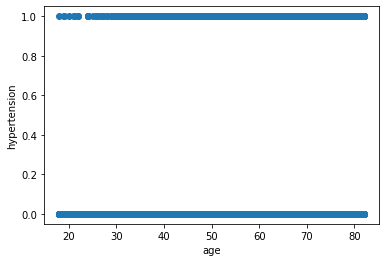

In [368]:
plt.scatter(x = df4['age'], y = df4['hypertension'])
plt.xlabel('age')
plt.ylabel('hypertension')

In [155]:
df1.duplicated().sum()
##no duplicated data 

0

In [381]:
df_pos_stroke = df4.loc[df4['stroke'] == 1.0]
#df_neg_stroke = df4.loc[df4['stroke'] == 0.0];

In [426]:
df_pos_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
97,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
174,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
178,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
197,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
28863,Male,79.0,0.0,1.0,Yes,Self-employed,Urban,88.29,36.0,never smoked,1.0
28891,Male,76.0,0.0,0.0,Yes,Self-employed,Rural,93.38,26.7,formerly smoked,1.0
28910,Female,56.0,0.0,0.0,Yes,Private,Rural,83.27,32.9,smokes,1.0
29004,Female,80.0,0.0,0.0,Yes,Self-employed,Urban,75.91,26.7,never smoked,1.0


Text(0.5, 0, 'percentage of people that have hypertension in case of stroke')

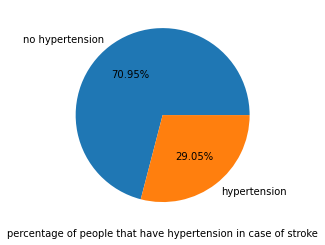

In [382]:
#does having hypertension increase the chances of getting a stroke?

x = df_pos_stroke.hypertension.value_counts()
mylabels = ["no hypertension", "hypertension"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of people that have hypertension in case of stroke')

Text(0.5, 0, 'percentage of job types of people that have a stroke')

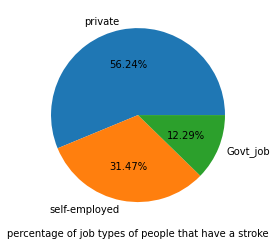

In [383]:
#Are job types a contributing factor to having a stroke?
x = df_pos_stroke.work_type.value_counts()
mylabels = ["private", "self-employed","Govt_job"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of job types of people that have a stroke')

Text(0.5, 0, 'percentage of gender for people with a stroke')

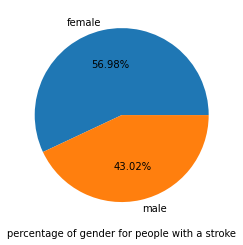

In [384]:
#are female more prone to having a stroke than men
x = df_pos_stroke.gender.value_counts()
mylabels = ["female", "male"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of gender for people with a stroke')

Text(0.5, 0, 'bmi chart for people that suffer a stroke')

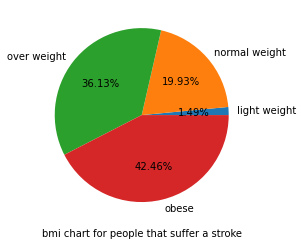

In [385]:
#Are overweight/obese people more prone to get a stroke?

x1 = df_pos_stroke.loc[df_pos_stroke['bmi'] < 18.5] #lightweight
x2 = df_pos_stroke.loc[(df_pos_stroke['bmi'] >= 18.5) & (df_pos_stroke['bmi'] <= 24.9)] #normal weight
x3 = df_pos_stroke.loc[(df_pos_stroke['bmi'] >= 25) & (df_pos_stroke['bmi'] <= 29.9)] #overweight
x4 = df_pos_stroke.loc[df_pos_stroke['bmi'] >= 30] #obese

x = [x1.shape[0], x2.shape[0], x3.shape[0], x4.shape[0]]
mylabels = ["light weight", "normal weight", "over weight", "obese"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('bmi chart for people that suffer a stroke' )

Text(0.5, 0, 'percentage of smoking status of people with hypertension that suffer a stroke')

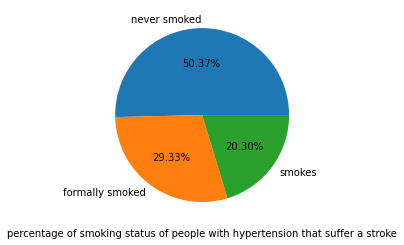

In [386]:
# Do smoking and hypertension together increase the change of a stroke?

df_hypertension = df4.loc[df4['hypertension'] == 1.0]
x1 = df_hypertension.smoking_status.value_counts()
mylabels = ["never smoked", "formally smoked", "smokes"]
plt.pie(x1, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of smoking status of people with hypertension that suffer a stroke' )

Text(0.5, 0, 'chart of the average glucose levels for people with a stroke')

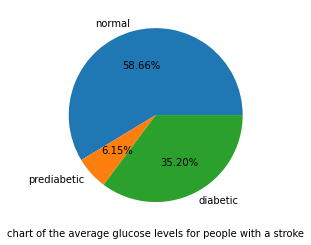

In [390]:
#Does having diabetes increases the chances of getting a stroke?

x1 = df_pos_stroke.loc[df_pos_stroke['avg_glucose_level'] < 117] #normal
x2 = df_pos_stroke.loc[(df_pos_stroke['avg_glucose_level'] >= 117) & (df_pos_stroke['avg_glucose_level'] <= 137)] #prediabetic
x3 = df_pos_stroke.loc[df_pos_stroke['avg_glucose_level'] > 137] #diabetic

x = [x1.shape[0], x2.shape[0], x3.shape[0]]
mylabels = ["normal", "prediabetic", "diabetic"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('chart of the average glucose levels for people with a stroke' )

Text(0.5, 0, 'percentage of residence types in our data')

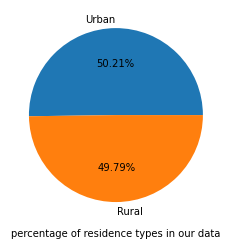

In [13]:
#Does living in urban or rural environment increase your chances of having a stroke? 
x1 = df.Residence_type.value_counts()
mylabels = ["Urban", "Rural"]
plt.pie(x1, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of residence types in our data' )

In [15]:
df.Residence_type.value_counts()

Urban    14520
Rural    14396
Name: Residence_type, dtype: int64

Text(0.5, 0, 'percentage of heart disease of people with hypertension that suffer a stroke')

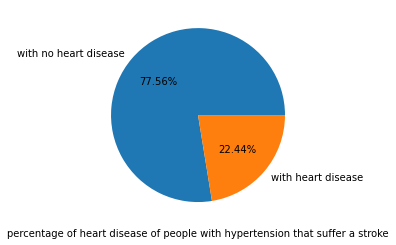

In [398]:
#Does having hypertension + heart disease increase the probablity of having a stroke?
df_hypertension = df_pos_stroke.loc[df_pos_stroke['hypertension'] == 1.0]
x1 = df_hypertension.heart_disease.value_counts()
mylabels = ["with no heart disease", "with heart disease"]
plt.pie(x1, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of heart disease of people with hypertension that suffer a stroke' )

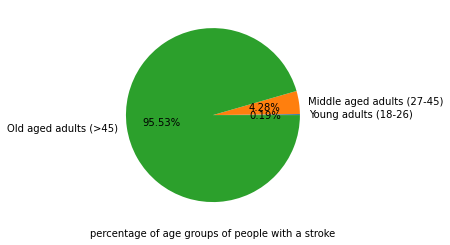

In [406]:
#Does having a stroke increase with age?
x1 = df_pos_stroke.loc[(df_pos_stroke['age'] >= 18) & (df_pos_stroke['age'] <= 26) ] #young adults
x2 = df_pos_stroke.loc[(df_pos_stroke['age'] >= 27) & (df_pos_stroke['age'] <= 45)] #middle aged adults
x3 = df_pos_stroke.loc[(df_pos_stroke['age'] >= 46) ] #old aged adults

x = [x1.shape[0], x2.shape[0], x3.shape[0]]
mylabels = ["Young adults (18-26)", "Middle aged adults (27-45)", "Old aged adults (>45)"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('percentage of age groups of people with a stroke' )
plt.savefig('age_vs_stroke.png')